# Extra Credit: Building regularized models for Boston data set
Perform a bias variance analysis of the Boston housing data set with the thirteen predictors, following the steps on the simple data set above. Use sklearn's  built-in functions to split the data into training, validation and test sets. What is the lowest achievable error on the test set with $\lambda = 0$? Select the best value for $\lambda$ and report the test set error with the best $\lambda$. Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. What is the test set error with quadratic features with the best $\lambda$ chosen with the validation set? What is the test set error with cubic features with the best $\lambda$ chosen with the validation set? Put your analysis code in a separate Python script or notebook called bostonexpt.py or bostonexpt.ipynb. Present your results analytically with plots to support your findings. Discuss the impact of regularization for building good models for the Boston housing data set.

## Use sklearn's built-in functions to split the data into training, validation and test sets.

Loading and Visualizing Data ...


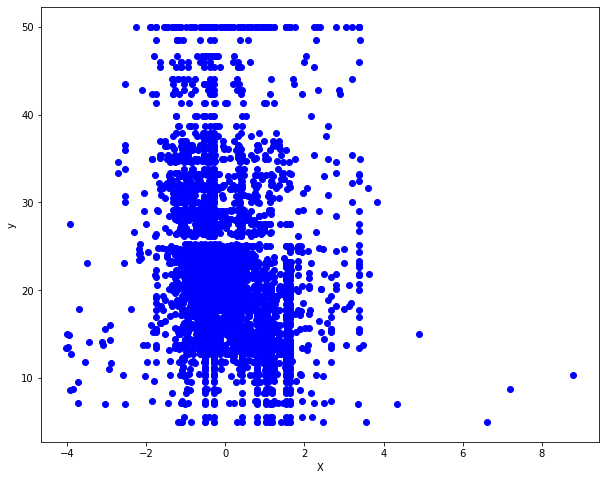

(323, 13) (323,) (81, 13) (81,) (102, 13) (102,)


In [1]:
### TODO: your Boston code here or in a separate notebook.
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import utils
import plot_utils
from reg_linear_regressor_multi import RegularizedLinearReg_SquaredLoss

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

########################################################################
## =========== Part 1: Loading and Visualizing Data ===================#
########################################################################
# Load Training Data

print('Loading and Visualizing Data ...')
boston_data = load_boston()
df = pd.DataFrame(data=boston_data.data, columns=boston_data.feature_names)
df.head()
#split data into train, validation and test dataset
X_train, X_test, y_train, y_test = train_test_split(boston_data.data, boston_data.target, test_size=0.2, random_state=1)
X, X_val, y, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
X, mu, sigma = utils.feature_normalize(X)
X_val = (X_val - mu) / sigma
X_test = (X_test - mu) / sigma
plot_utils.plot_data(X, y, 'X', 'y')
plt.show()
print(X.shape, y.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape)

## The lowest achievable error on the test set with $\lambda = 0$

In [2]:
# append a column of ones to matrix X

XX = np.vstack([np.ones((X.shape[0],)),X.T]).T

#  Train linear regression with lambda = 0

reglinear_reg1 = RegularizedLinearReg_SquaredLoss()
theta_opt0 = reglinear_reg1.train(XX,y,reg=0.0,num_iters=1000)
print('Theta at lambda = 0 is %s' % (theta_opt0))
XX_test = np.vstack([np.ones((X_test.shape[0],)),X_test.T]).T
test_error = reglinear_reg1.loss(theta_opt0, XX_test, y_test, 0.0)
print('test error is', test_error)

Optimization terminated successfully.
         Current function value: 11.161633
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Theta at lambda = 0 is [22.67461055 -1.16944927  1.63225402  0.38015395  0.64240393 -2.77127208
  1.537281    0.4527835  -3.31781527  2.77056382 -1.70897112 -2.29044199
  0.53350691 -4.43787891]
test error is 12.930601133114877


## Select the best value for  𝜆  and report the test set error with the best  𝜆 

Optimization terminated successfully.
         Current function value: 11.161633
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.171161
         Iterations: 27
         Function evaluations: 28
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 11.190108
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 11.255325
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 11.433190
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 11.981686
         Iterations: 23
         Function evaluations:

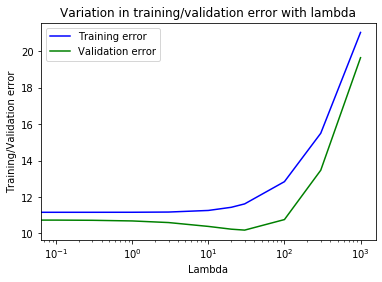

In [4]:
XX_val = np.vstack([np.ones((X_val.shape[0],)),X_val.T]).T
reg_vec, error_train, error_val = utils.validation_curve(XX, y, XX_val, y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_select_lambda.png')

In [11]:
best_reg = 30.0
reglinear_reg2 = RegularizedLinearReg_SquaredLoss()
theta_opt2 = reglinear_reg2.train(XX,y,reg=best_reg,num_iters=5000)
print('Theta at lambda = %.2f is %s' % (best_reg, theta_opt2))
test_error2 = reglinear_reg2.loss(theta_opt2, XX_test, y_test, 0.0)
print('Test error at lambda = %.2f is %s' % (best_reg, test_error2))

Optimization terminated successfully.
         Current function value: 13.196128
         Iterations: 20
         Function evaluations: 21
         Gradient evaluations: 21
Theta at lambda = 30.00 is [22.67461815 -0.93123799  1.02524069 -0.15003565  0.69718116 -1.74545197
  1.92313322  0.03571871 -2.25710115  1.18158131 -0.45876938 -1.97078528
  0.56425932 -3.71463933]
Test error at lambda = 30.00 is 13.256266000933937


Use the technique of adding features to extend each column of the Boston data set with powers of the values in the column. Repeat the bias-variance analysis with quadratic and cubic features. 

## What is the test set error with quadratic features with the best  𝜆  chosen with the validation set?

Optimization terminated successfully.
         Current function value: 2.868339
         Iterations: 469
         Function evaluations: 476
         Gradient evaluations: 476
Optimization terminated successfully.
         Current function value: 2.941355
         Iterations: 292
         Function evaluations: 299
         Gradient evaluations: 299
Optimization terminated successfully.
         Current function value: 3.022994
         Iterations: 207
         Function evaluations: 214
         Gradient evaluations: 214
Optimization terminated successfully.
         Current function value: 3.220600
         Iterations: 134
         Function evaluations: 141
         Gradient evaluations: 141
Optimization terminated successfully.
         Current function value: 3.604304
         Iterations: 87
         Function evaluations: 94
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 4.460310
         Iterations: 55
         Function evalua

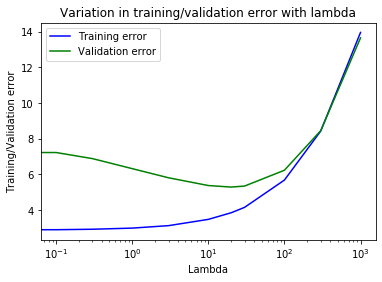

In [6]:
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

X_poly, mu_poly, sigma_poly = utils.feature_normalize(X_poly)
X_poly_val = (X_poly_val - mu_poly) / sigma_poly
X_poly_test = (X_poly_test - mu_poly) / sigma_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T

reg_vec, error_train, error_val = utils.validation_curve(XX_poly, y, XX_poly_val, y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_select_lambda_poly.png')

In [12]:
best_reg_poly = 30.0
reglinear_reg3 = RegularizedLinearReg_SquaredLoss()
theta_opt3 = reglinear_reg3.train(XX_poly,y,reg=best_reg_poly,num_iters=5000)
print('Theta at lambda = %.2f is %s' % (best_reg_poly, theta_opt3))
test_error3 = reglinear_reg3.loss(theta_opt3, XX_poly_test, y_test, 0.0)
print('Test error at lambda = %.2f is %s' % (best_reg, test_error3))

Optimization terminated successfully.
         Current function value: 5.955923
         Iterations: 37
         Function evaluations: 44
         Gradient evaluations: 44
Theta at lambda = 30.00 is [ 2.26746132e+01 -2.09565578e-01  1.02377222e-01 -2.68406631e-01
  6.35650715e-01 -7.46463338e-01  2.81158396e+00 -6.74301884e-01
 -1.27707579e+00  3.17808576e-01 -4.79471300e-01 -8.40496078e-01
  5.05415195e-01 -2.73168005e+00  4.27535271e-01  1.14870934e-01
 -3.40113912e-02  9.20875583e-01 -2.76616252e-01  4.64225316e-01
  2.48131682e-02  2.81480673e-01 -3.08151546e-01 -6.64167355e-02
  7.89969306e-02 -1.63688622e-01  1.50007931e-01  1.83525565e-01
 -4.33405329e-02  8.78668892e-02  1.68292322e-01  3.51567629e-01
  1.12778151e-01 -8.96943803e-02  9.38567061e-02  3.17385111e-02
  2.14945569e-01  2.00058286e-02 -1.86095952e-01  2.59405463e-01
  1.49167649e-01  2.66511321e-01 -1.48891271e-01  5.68763319e-01
  7.31929671e-02  1.81901259e-02 -1.47333612e-01 -5.40185736e-01
 -3.13727319e-02 -5.8

## What is the test set error with cubic features with the best  𝜆  chosen with the validation set?

         Current function value: 0.010649
         Iterations: 1000
         Function evaluations: 1006
         Gradient evaluations: 1006
Optimization terminated successfully.
         Current function value: 0.445336
         Iterations: 377
         Function evaluations: 383
         Gradient evaluations: 383
Optimization terminated successfully.
         Current function value: 0.691851
         Iterations: 247
         Function evaluations: 253
         Gradient evaluations: 253
Optimization terminated successfully.
         Current function value: 1.094074
         Iterations: 154
         Function evaluations: 160
         Gradient evaluations: 160
Optimization terminated successfully.
         Current function value: 1.589472
         Iterations: 105
         Function evaluations: 111
         Gradient evaluations: 111
Optimization terminated successfully.
         Current function value: 2.285028
         Iterations: 71
         Function evaluations: 77
         Gradient eval

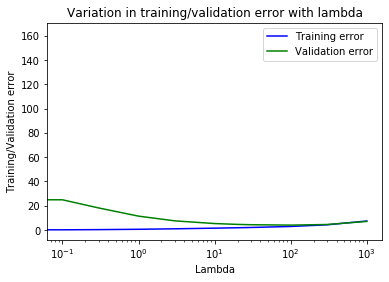

In [13]:
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=False)

X_poly = poly.fit_transform(X)
X_poly_val = poly.fit_transform(X_val)
X_poly_test = poly.fit_transform(X_test)

X_poly, mu_poly, sigma_poly = utils.feature_normalize(X_poly)
X_poly_val = (X_poly_val - mu_poly) / sigma_poly
X_poly_test = (X_poly_test - mu_poly) / sigma_poly

XX_poly = np.vstack([np.ones((X_poly.shape[0],)),X_poly.T]).T
XX_poly_val = np.vstack([np.ones((X_poly_val.shape[0],)),X_poly_val.T]).T
XX_poly_test = np.vstack([np.ones((X_poly_test.shape[0],)),X_poly_test.T]).T

reg_vec, error_train, error_val = utils.validation_curve(XX_poly, y, XX_poly_val, y_val)
plot_utils.plot_lambda_selection(reg_vec, error_train, error_val)
plt.savefig('ex_select_lambda_poly2.png')

In [14]:
best_reg_poly = 30.0
reglinear_reg4 = RegularizedLinearReg_SquaredLoss()
theta_opt4 = reglinear_reg4.train(XX_poly,y,reg=best_reg_poly,num_iters=5000)
print('Theta at lambda = %.2f is %s' % (best_reg_poly, theta_opt4))
test_error4 = reglinear_reg4.loss(theta_opt4, XX_poly_test, y_test, 0.0)
print('Test error at lambda = %.2f is %s' % (best_reg_poly, test_error4))

Optimization terminated successfully.
         Current function value: 3.178836
         Iterations: 54
         Function evaluations: 61
         Gradient evaluations: 61
Theta at lambda = 30.00 is [ 2.26746130e+01 -1.25343022e-01  1.03289012e-02 -1.01213468e-01
  1.27249449e-01 -1.60221086e-01  1.06315957e+00 -7.57031050e-01
 -3.43386538e-01  1.47992191e-01 -1.80918374e-01 -4.17528883e-01
  1.41230031e-01 -8.56561095e-01  1.22911703e-01  1.04465403e-01
 -7.01734737e-02  5.40013089e-02 -9.79993075e-02 -3.10987567e-01
  1.49224602e-01  1.10371356e-01 -1.13988182e-01 -3.07595614e-02
  1.22351181e-01 -2.14324068e-02  1.64399783e-01  2.99057527e-02
  6.27209691e-02 -1.33656848e-01  9.78540099e-02 -1.54902052e-01
  1.57498860e-01 -1.45717580e-02 -1.47562519e-01  1.87436759e-01
  8.99587241e-02 -1.18198637e-01  3.25511255e-01  1.82234309e-01
  4.95332297e-02  5.36147519e-03 -3.40201981e-01  1.25104122e-01
  2.58600222e-02 -2.23448497e-01 -1.29286201e-02 -1.06361787e-01
  4.16187714e-02 -3.1